In [1]:
import pandas as pd
df = pd.read_csv('/content/nifty50_closing_prices.csv')
display(df.head())

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
0,2024-01-01,2914.533936,1038.321777,5727.949707,3327.104004,1096.853394,6647.077148,1675.343018,659.398193,1007.435730,...,28304.263672,1241.662476,781.448975,133.963882,3665.432861,1262.217896,3665.156982,10402.311523,592.700012,233.428848
1,2024-01-02,2929.719971,1068.593994,5724.263184,3322.450439,1092.406982,6611.317871,1685.136841,671.232849,1016.037842,...,27933.277344,1277.082153,775.320801,133.724396,3638.599121,1243.680786,3686.188232,10144.540039,594.450012,229.539612
2,2024-01-03,3000.255371,1084.299805,5746.128906,3305.061035,1097.752808,6930.176270,1676.592285,667.144897,1029.463013,...,28065.740234,1279.446777,772.404968,129.653290,3550.644531,1210.693848,3681.005371,10051.939453,586.849976,223.033035
3,2024-01-04,2995.559814,1112.986572,5740.052734,3311.281982,1122.533691,6866.345215,1700.876831,696.121582,1042.092651,...,28201.138672,1293.585205,786.539429,128.599579,3526.648193,1213.904907,3707.568359,9955.759766,587.650024,221.320786
4,2024-01-05,3003.852051,1143.754272,5732.133301,3287.377686,1136.073120,6922.240723,1708.422119,696.627441,1040.799805,...,26873.916016,1281.023193,781.794983,128.024826,3595.030762,1214.683472,3700.441650,9957.001953,581.250000,223.375488


In [3]:
#Imagine you have $10,000 to invest. Where do you put it? One fund? Five funds? How do you balance returns against risk? Today, I'm presenting
#a Mutual Fund Portfolio Optimization project built in Python that answers-how do you maximize returns while managing risk?

#This code transforms raw historical data into actionable investment strategies using Monte Carlo simulations and modern portfolio theory."
#Individual investors struggle to build diversified portfolios. To create a mutual fund investment plan based on high ROI and low risk using Python.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           348 non-null    object 
 1   ADANIENT.NS    348 non-null    float64
 2   ADANIPORTS.NS  348 non-null    float64
 3   APOLLOHOSP.NS  348 non-null    float64
 4   ASIANPAINT.NS  348 non-null    float64
 5   AXISBANK.NS    348 non-null    float64
 6   BAJAJ-AUTO.NS  348 non-null    float64
 7   BAJAJFINSV.NS  348 non-null    float64
 8   BAJFINANCE.NS  348 non-null    float64
 9   BHARTIARTL.NS  348 non-null    float64
 10  BPCL.NS        348 non-null    float64
 11  BRITANNIA.NS   348 non-null    float64
 12  CIPLA.NS       348 non-null    float64
 13  COALINDIA.NS   348 non-null    float64
 14  DIVISLAB.NS    348 non-null    float64
 15  DRREDDY.NS     348 non-null    float64
 16  EICHERMOT.NS   348 non-null    float64
 17  GRASIM.NS      348 non-null    float64
 18  HCLTECH.NS

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.isnull().sum()

,0
Date,0
ADANIENT.NS,0
ADANIPORTS.NS,0
APOLLOHOSP.NS,0
ASIANPAINT.NS,0
AXISBANK.NS,0
BAJAJ-AUTO.NS,0
BAJAJFINSV.NS,0
BAJFINANCE.NS,0
BHARTIARTL.NS,0


In [7]:
df.describe()

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
count,348,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,...,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2024-09-15 03:51:43.448275968,2816.581010,1296.588756,6576.756746,2702.238383,1127.716254,9015.747209,1720.193588,693.427848,1495.240487,...,26748.720018,1659.744047,857.482649,146.542945,3880.325089,1475.111822,3442.688262,10882.036753,561.197772,259.214685
min,2024-01-01 00:00:00,2094.928955,1038.321777,5660.160645,2112.608643,948.099976,6611.317871,1476.368652,570.160095,1007.435730,...,23881.552734,1241.662476,574.807922,120.128532,3203.030273,1147.882202,2986.949951,9308.747070,451.899994,214.218307
25%,2024-05-12 06:00:00,2438.927979,1186.168396,6188.093262,2326.943604,1066.751770,8260.608887,1593.644562,630.676819,1323.462097,...,25282.496094,1526.666290,729.329330,135.723438,3693.314758,1284.951294,3290.887451,9975.268799,516.887497,239.926212
50%,2024-09-16 12:00:00,2972.829956,1304.429871,6653.447998,2809.708252,1136.275024,8889.750000,1669.496704,664.019165,1563.900024,...,26374.378906,1701.049988,888.718567,146.648232,3891.311890,1492.700012,3428.125000,11184.059570,555.149994,256.132385
75%,2025-01-21 06:00:00,3119.346680,1403.285431,6946.062866,2941.164551,1177.437469,9573.824707,1845.899963,725.128555,1655.537506,...,27805.208496,1788.916718,977.192352,156.486752,4079.125122,1644.404510,3601.563599,11535.687744,608.487488,275.549599
max,2025-05-30 00:00:00,3641.918457,1582.451172,7426.246582,3346.584473,1317.300049,12666.400391,2105.000000,918.049988,1901.000000,...,31615.000000,1937.026123,1151.945801,175.839325,4431.997070,1796.400024,3854.039062,12237.000000,688.000000,319.049988
std,NaN,374.121723,133.099995,444.294207,343.859166,78.257418,1188.542126,152.856998,85.505839,227.472873,...,1883.955631,158.156626,140.557243,12.938084,286.836268,185.008140,203.472991,801.943227,57.738368,25.607378


# Task
Perform an in-depth financial analysis of Nifty 50 stocks from the `/content/nifty50_closing_prices.csv` dataset, including calculating daily percentage returns, visualizing historical price trends, analyzing and visualizing return distributions, and computing annualized returns and volatility. Define a sample portfolio, calculate its historical daily returns, annualized returns, and volatility. Implement Monte Carlo simulations to predict future portfolio outcomes, visualize the distribution of simulated returns, and calculate key risk metrics like the Sharpe Ratio. Finally, synthesize all findings into actionable recommendations for investors.

**Reasoning**:
First, I'll set the 'Date' column as the index of the DataFrame, as requested. Then, I'll calculate the daily percentage returns for all stock columns, excluding the 'Date' column which has become the index, and store them in a new DataFrame called `daily_returns`.



In [8]:
df.set_index('Date', inplace=True)
daily_returns = df.pct_change()
display(daily_returns.head())

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,0.005210,0.029155,-0.000644,-0.001399,-0.004054,-0.005380,0.005846,0.017948,0.008539,0.009291,...,-0.013107,0.028526,-0.007842,-0.001788,-0.007321,-0.014686,0.005738,-0.024780,0.002953,-0.016661
2024-01-03,0.024076,0.014698,0.003820,-0.005234,0.004894,0.048229,-0.005071,-0.006090,0.013213,0.010521,...,0.004742,0.001852,-0.003761,-0.030444,-0.024173,-0.026524,-0.001406,-0.009128,-0.012785,-0.028346
2024-01-04,-0.001565,0.026456,-0.001057,0.001882,0.022574,-0.009211,0.014484,0.043434,0.012268,-0.018219,...,0.004824,0.011050,0.018299,-0.008127,-0.006758,0.002652,0.007216,-0.009568,0.001363,-0.007677
2024-01-05,0.002768,0.027644,-0.001380,-0.007219,0.012061,0.008141,0.004436,0.000727,-0.001241,0.000994,...,-0.047063,-0.009711,-0.006032,-0.004469,0.019390,0.000641,-0.001922,0.000125,-0.010891,0.009284


## Data Cleaning & Quality Check

### Subtask:
Thoroughly check for and handle any missing values, outliers, or inconsistencies in the daily returns data. This may involve forward-filling, dropping, or interpolating data points to ensure data integrity for analysis and simulations. Verify data types are appropriate for numerical calculations.


**Reasoning**:
First, I'll display the `daily_returns` DataFrame to review its initial state, which helps in understanding the impact of `pct_change()` on the first row.



In [9]:
daily_returns.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,0.005210,0.029155,-0.000644,-0.001399,-0.004054,-0.005380,0.005846,0.017948,0.008539,0.009291,...,-0.013107,0.028526,-0.007842,-0.001788,-0.007321,-0.014686,0.005738,-0.024780,0.002953,-0.016661
2024-01-03,0.024076,0.014698,0.003820,-0.005234,0.004894,0.048229,-0.005071,-0.006090,0.013213,0.010521,...,0.004742,0.001852,-0.003761,-0.030444,-0.024173,-0.026524,-0.001406,-0.009128,-0.012785,-0.028346
2024-01-04,-0.001565,0.026456,-0.001057,0.001882,0.022574,-0.009211,0.014484,0.043434,0.012268,-0.018219,...,0.004824,0.011050,0.018299,-0.008127,-0.006758,0.002652,0.007216,-0.009568,0.001363,-0.007677
2024-01-05,0.002768,0.027644,-0.001380,-0.007219,0.012061,0.008141,0.004436,0.000727,-0.001241,0.000994,...,-0.047063,-0.009711,-0.006032,-0.004469,0.019390,0.000641,-0.001922,0.000125,-0.010891,0.009284


**Reasoning**:
As instructed, I'll first check for missing values in the `daily_returns` DataFrame to understand their extent. Then, I will handle the missing values by dropping the first row, which is a common practice when calculating percentage changes, as the first row will always be `NaN`.



In [10]:
print('Missing values before handling:')
display(daily_returns.isnull().sum().head())

# Drop the first row which contains NaN values from pct_change()
daily_returns.dropna(inplace=True)

print('\nMissing values after handling:')
display(daily_returns.isnull().sum().head())

Missing values before handling:


,0
ADANIENT.NS,1
ADANIPORTS.NS,1
APOLLOHOSP.NS,1
ASIANPAINT.NS,1
AXISBANK.NS,1



Missing values after handling:


,0
ADANIENT.NS,0
ADANIPORTS.NS,0
APOLLOHOSP.NS,0
ASIANPAINT.NS,0
AXISBANK.NS,0


**Reasoning**:
As instructed, I will check the data types of the columns in the `daily_returns` DataFrame using `.info()` to ensure they are numeric (float64) for further calculations.



In [11]:
daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 347 entries, 2024-01-02 to 2025-05-30
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ADANIENT.NS    347 non-null    float64
 1   ADANIPORTS.NS  347 non-null    float64
 2   APOLLOHOSP.NS  347 non-null    float64
 3   ASIANPAINT.NS  347 non-null    float64
 4   AXISBANK.NS    347 non-null    float64
 5   BAJAJ-AUTO.NS  347 non-null    float64
 6   BAJAJFINSV.NS  347 non-null    float64
 7   BAJFINANCE.NS  347 non-null    float64
 8   BHARTIARTL.NS  347 non-null    float64
 9   BPCL.NS        347 non-null    float64
 10  BRITANNIA.NS   347 non-null    float64
 11  CIPLA.NS       347 non-null    float64
 12  COALINDIA.NS   347 non-null    float64
 13  DIVISLAB.NS    347 non-null    float64
 14  DRREDDY.NS     347 non-null    float64
 15  EICHERMOT.NS   347 non-null    float64
 16  GRASIM.NS      347 non-null    float64
 17  HCLTECH.NS     347 non-null    floa

## Feature Engineering & Detailed EDA

### Subtask:
Calculate annualized returns and volatility for all stocks, and visualize historical price trends and daily return distributions for selected stocks.


**Reasoning**:
First, I'll calculate the mean daily return for each stock and annualize it by multiplying by 252 trading days. Next, I'll calculate the standard deviation of daily returns for each stock and annualize it by multiplying by the square root of 252. Finally, I'll combine these metrics into a `summary_stats` DataFrame and display it, as instructed.



In [12]:
mean_daily_returns = daily_returns.mean()
annualized_returns = mean_daily_returns * 252

std_daily_returns = daily_returns.std()
annualized_volatility = std_daily_returns * (252**0.5)

summary_stats = pd.DataFrame({
    'Annualized Returns': annualized_returns,
    'Annualized Volatility': annualized_volatility
})

display(summary_stats.head())

,Annualized Returns,Annualized Volatility
ADANIENT.NS,-0.009926,0.428525
ADANIPORTS.NS,0.306464,0.383095
APOLLOHOSP.NS,0.158224,0.223925
ASIANPAINT.NS,-0.265357,0.210709
AXISBANK.NS,0.091106,0.247676


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

**Reasoning**:
Selecting few stocks (e.g., 'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS') from the original `df` DataFrame and plot their historical closing prices over time to visualize their trends.



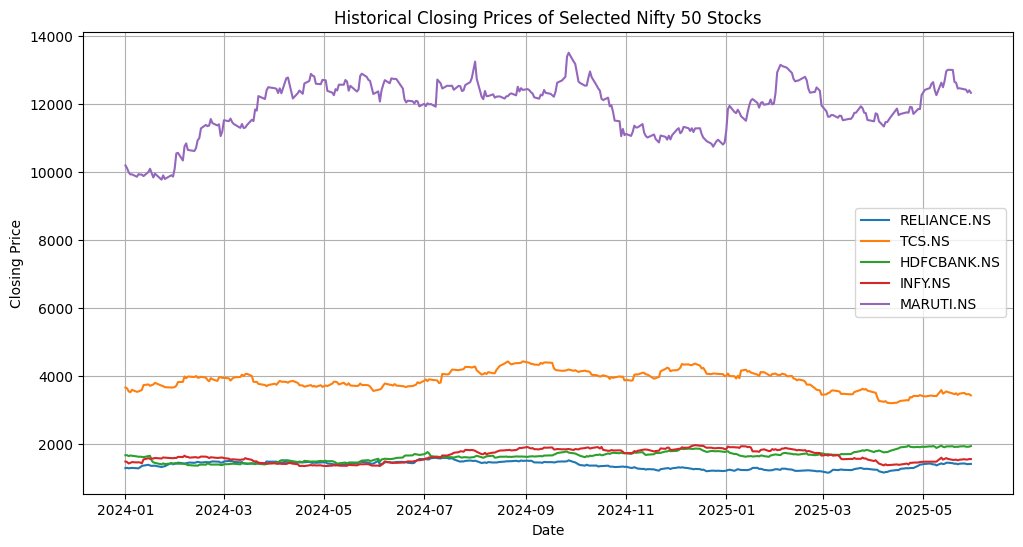

In [14]:
selected_stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'MARUTI.NS']
plt.figure(figsize=(12, 6))
for stock in selected_stocks:
    plt.plot(df.index, df[stock], label=stock)
plt.title('Historical Closing Prices of Selected Nifty 50 Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
As instructed, I will select one stock, for example, 'RELIANCE.NS', and plot a histogram of its daily returns from the `daily_returns` DataFrame. I will then overlay a Kernel Density Estimate (KDE) plot to show the distribution density of these daily returns, ensuring proper labels and a title for the plot.



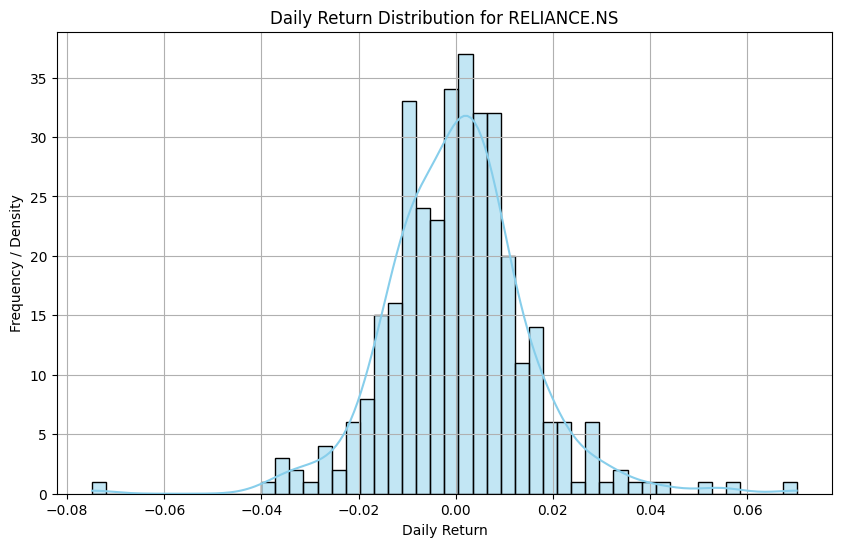

In [15]:
selected_stock_for_distribution = 'RELIANCE.NS'
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns[selected_stock_for_distribution], kde=True, bins=50, color='skyblue')
plt.title(f'Daily Return Distribution for {selected_stock_for_distribution}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

## Interactive Portfolio Construction & Historical Performance

### Subtask:
Define a sample portfolio, calculate its historical daily returns, annualized returns, and volatility.


**Reasoning**:
As instructed, I will define a list of tickers for the sample portfolio and assign equal weights to each stock. This ensures a balanced starting point for portfolio analysis.



In [16]:
import numpy as np
portfolio_stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'MARUTI.NS']
weights = np.array([1/len(portfolio_stocks)] * len(portfolio_stocks))

print(f"Portfolio Stocks: {portfolio_stocks}")
print(f"Assigned Weights: {weights}")

Portfolio Stocks: ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'MARUTI.NS']
Assigned Weights: [0.2 0.2 0.2 0.2 0.2]


**Reasoning**:
As instructed, I will calculate the daily returns of the portfolio by first selecting the daily returns for the `portfolio_stocks`, then multiplying them by the `weights` array, and finally summing across the columns to get the `portfolio_daily_returns` Series.



In [17]:
portfolio_daily_returns = daily_returns[portfolio_stocks].dot(weights)

print(f"Portfolio Daily Returns (Head):\n{portfolio_daily_returns.head()}")

Portfolio Daily Returns (Head):
Date
2024-01-02   -0.003539
2024-01-03   -0.018236
2024-01-04    0.003637
2024-01-05    0.006364
2024-01-08   -0.009655
dtype: float64


**Reasoning**:
As instructed, I will calculate the annualized return of the portfolio by first computing the mean of the `portfolio_daily_returns` and then multiplying it by 252 (the number of trading days in a year).



In [18]:
annualized_portfolio_return = portfolio_daily_returns.mean() * 252

print(f"Annualized Portfolio Return: {annualized_portfolio_return:.4f}")

Annualized Portfolio Return: 0.0862


**Reasoning**:
As instructed, I will calculate the annualized volatility of the portfolio by first computing the standard deviation of the `portfolio_daily_returns` and then multiplying it by the square root of 252 (the number of trading days in a year).



In [19]:
annualized_portfolio_volatility = portfolio_daily_returns.std() * np.sqrt(252)

print(f"Annualized Portfolio Volatility: {annualized_portfolio_volatility:.4f}")

Annualized Portfolio Volatility: 0.1517


## Comprehensive Risk & Return Analysis

### Subtask:
Compute advanced risk metrics for the constructed portfolio, including the Sharpe Ratio (risk-adjusted return) and Sortino Ratio (downside risk-adjusted return). Visualize the risk-return trade-off.


**Reasoning**:
As instructed, I will define a risk-free rate, which is a necessary component for calculating both the Sharpe Ratio and Sortino Ratio.



In [20]:
risk_free_rate = 0.02

print(f"Risk-Free Rate: {risk_free_rate}")

Risk-Free Rate: 0.02


**Reasoning**:
As instructed, I will calculate the Sharpe Ratio for the portfolio using the defined formula, leveraging the previously calculated annualized portfolio return, risk-free rate, and annualized portfolio volatility.



In [21]:
sharpe_ratio = (annualized_portfolio_return - risk_free_rate) / annualized_portfolio_volatility

print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Sharpe Ratio: 0.4364


**Reasoning**:
As instructed, I will calculate the downside returns for the portfolio by filtering the `portfolio_daily_returns` to include only values below 0 for simplicity, which are necessary for computing the Sortino Ratio.



In [22]:
downside_returns = portfolio_daily_returns[portfolio_daily_returns < 0]

print(f"Number of downside returns: {len(downside_returns)}")
display(downside_returns.head())

Number of downside returns: 170


,0
Date,
2024-01-02,-0.003539
2024-01-03,-0.018236
2024-01-08,-0.009655
2024-01-16,-0.004787
2024-01-17,-0.019093


**Reasoning**:
As instructed, I will calculate the annualized downside deviation by first squaring the `downside_returns`, then taking their mean, followed by the square root, and finally annualizing this value by multiplying by the square root of 252.



In [23]:
downside_deviation = np.sqrt(np.mean(downside_returns**2))
annualized_downside_deviation = downside_deviation * np.sqrt(252)

print(f"Annualized Downside Deviation: {annualized_downside_deviation:.4f}")

Annualized Downside Deviation: 0.1465


**Reasoning**:
As instructed, I will calculate the Sortino Ratio for the portfolio using the formula: `(annualized_portfolio_return - risk_free_rate) / annualized_downside_deviation`, leveraging the previously calculated annualized portfolio return, risk-free rate, and annualized downside deviation.



In [24]:
sortino_ratio = (annualized_portfolio_return - risk_free_rate) / annualized_downside_deviation

print(f"Sortino Ratio: {sortino_ratio:.4f}")

Sortino Ratio: 0.4518


**Reasoning**:
As instructed, I will create a scatter plot of 'Annualized Volatility' vs. 'Annualized Returns' for all individual stocks using the `summary_stats` DataFrame. I will add appropriate labels and a title to the plot to visualize the risk-return trade-off for Nifty 50 stocks.



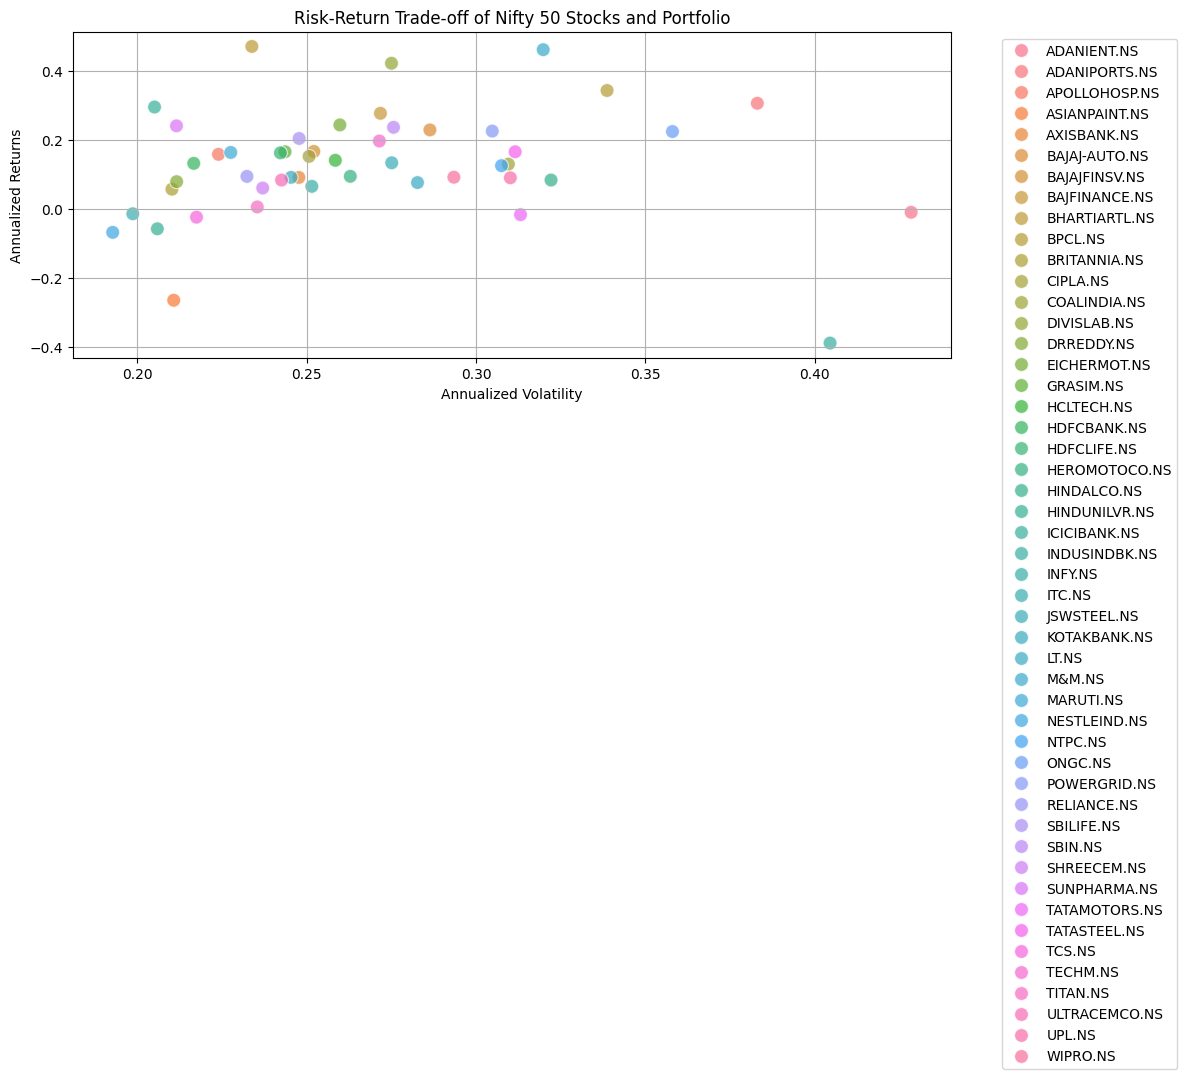

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annualized Volatility', y='Annualized Returns', data=summary_stats, hue=summary_stats.index, legend='brief', s=100, alpha=0.7)
plt.title('Risk-Return Trade-off of Nifty 50 Stocks and Portfolio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Returns')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()